In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read the data
df = pd.read_csv("train.csv").set_index("ID")


In [4]:
desc = df.describe().transpose()
columns_to_drop = desc.loc[desc["std"]==0].index.values
df.drop(columns_to_drop, axis=1, inplace=True)

In [6]:
df08 = df[["X{}".format(x) for x in range(9) if x != 7]]

In [9]:
tot_cardinality = 0
for c in df08.columns.values:
    cardinality = len(df08[c].unique())
    print(c, cardinality)
    tot_cardinality += cardinality
print(tot_cardinality)


X0 47
X1 27
X2 44
X3 7
X4 4
X5 29
X6 12
X8 25
195


In [18]:
df.head()

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,88.53,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,76.26,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df = pd.get_dummies(df, columns=["X{}".format(x) for x in range(9) if x != 7])
df.drop(df.loc[df["y"] > 250].index, inplace=True)


In [13]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2_results = pca2.fit_transform(df.drop(["y"], axis=1))


In [31]:
l=df['y']
label = l.head(4208)
label

ID
0       130.81
6        88.53
7        76.26
9        80.62
13       78.02
18       92.93
24      128.76
25       91.91
27      108.67
30      126.99
31      102.09
32       98.12
34       82.62
36       94.12
37       99.15
38       93.64
39      106.10
40      114.13
44       89.81
47       90.81
48       90.56
49       94.57
50      108.14
52      120.77
54       84.84
60       93.59
61      104.07
62       89.37
66       90.08
67      128.19
         ...  
8354     85.93
8356     90.45
8357     90.06
8362     90.38
8367     95.56
8368    109.00
8369    109.64
8371    131.98
8373     98.15
8374    102.33
8375    102.42
8378     89.11
8382     88.93
8383    103.03
8384    107.24
8385     91.13
8387     86.23
8390     99.93
8392     89.25
8393     97.09
8395     88.24
8397    108.59
8399    107.39
8402    123.34
8403     85.71
8405    107.39
8406    108.77
8412    109.22
8415     87.48
8417    110.85
Name: y, Length: 4208, dtype: float64

In [33]:
pca_data = np.vstack((pca2_results.T, label)).T

In [44]:
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
pca_df['hue'] = pca_df['label']//10

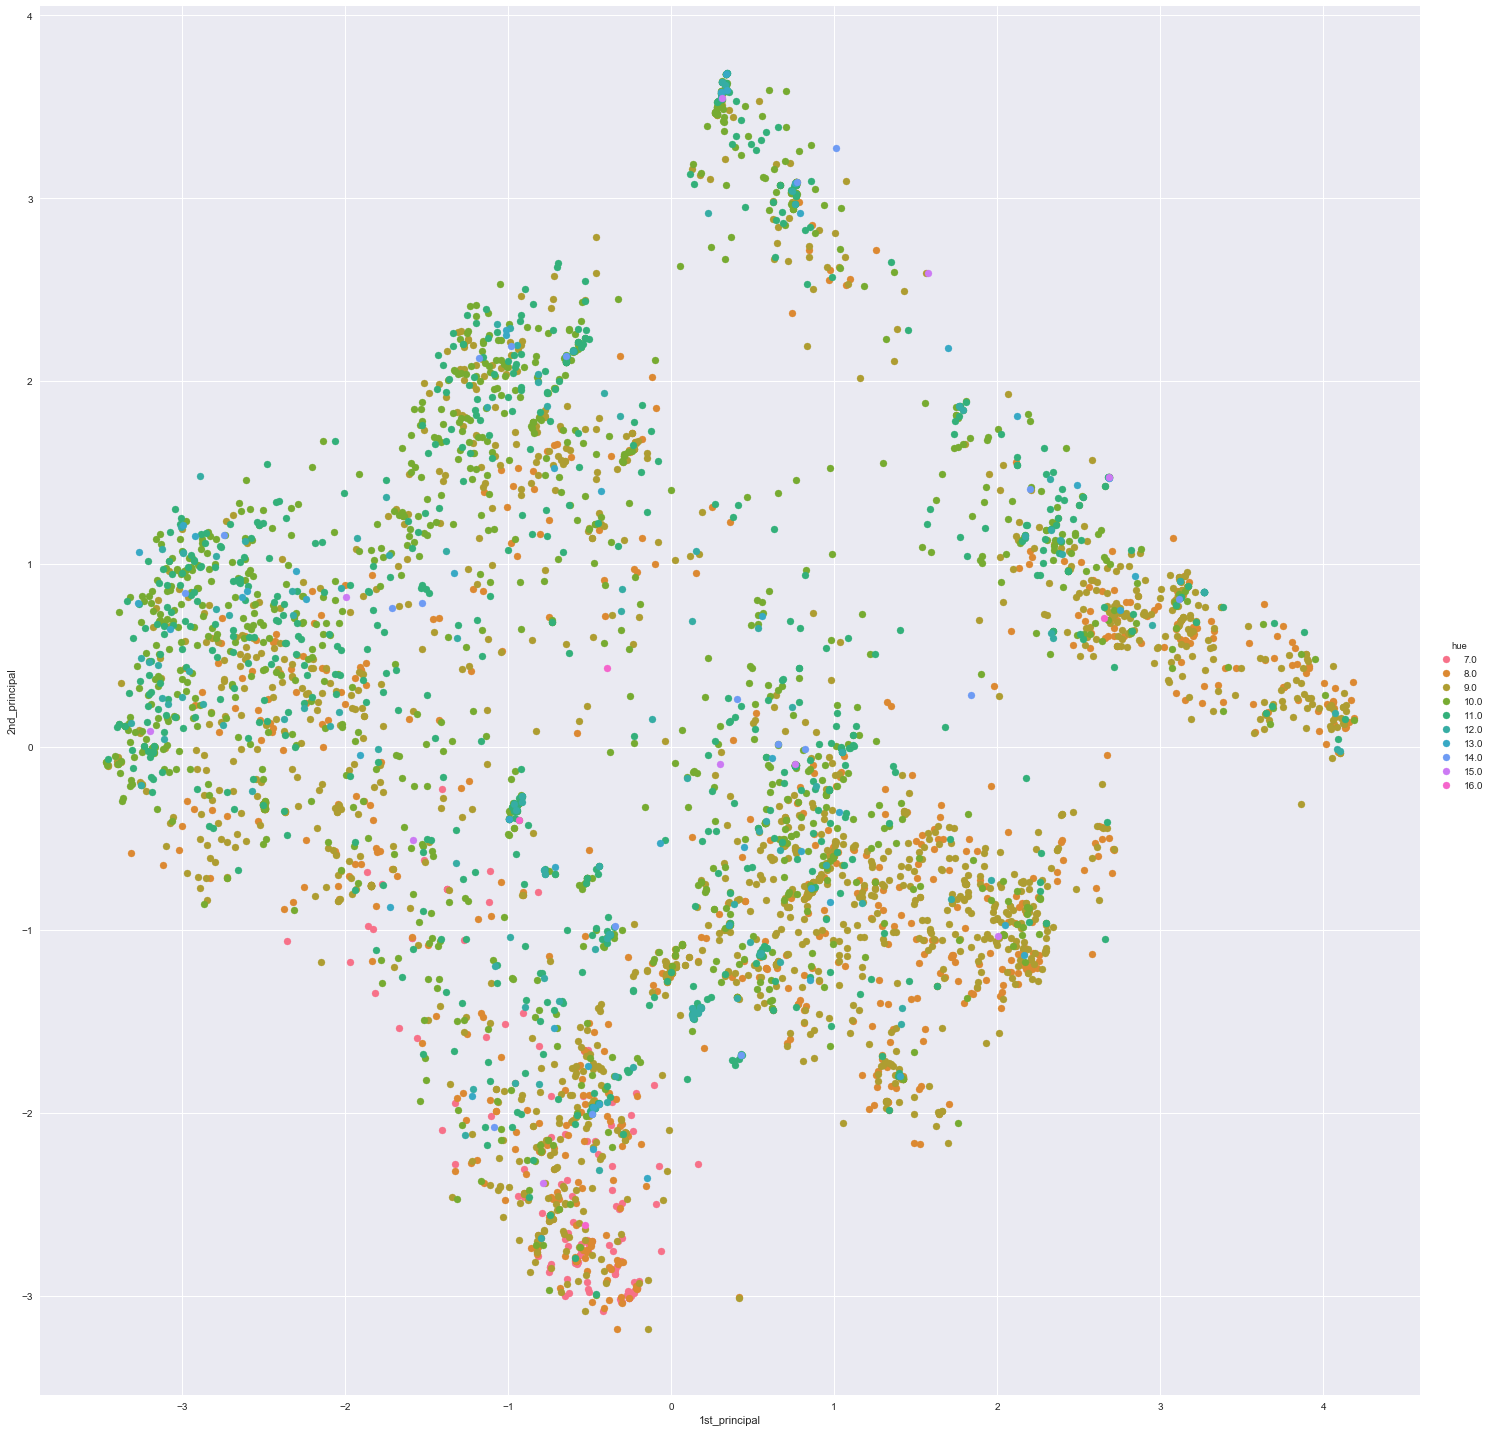

In [49]:
sns.FacetGrid(pca_df, hue="hue", size=20).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [50]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2)
tsne2_results = tsne2.fit_transform(df.drop(["y"], axis=1))

tsne2

TSNE(angle=0.5, early_exaggeration=4.0, init='random', learning_rate=1000.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=30,
   perplexity=30.0, random_state=None, verbose=0)

In [51]:
tsne2_results

array([[ -4.89594934,   7.60367416],
       [  3.59320406,   1.21163663],
       [ -9.09864703,   9.56582446],
       ..., 
       [ -6.55276406, -13.87371816],
       [  7.31947428,   7.25960593],
       [  0.44615147,   9.67943651]])

In [52]:
tsne2_data = np.vstack((tsne2_results.T, label)).T
'''
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
pca_df['hue'] = pca_df['label']//10

sns.FacetGrid(pca_df, hue="hue", size=20).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()
'''

'\npca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))\npca_df[\'hue\'] = pca_df[\'label\']//10\n\nsns.FacetGrid(pca_df, hue="hue", size=20).map(plt.scatter, \'1st_principal\', \'2nd_principal\').add_legend()\nplt.show()\n'

In [54]:
tsne2_data = pd.DataFrame(data=tsne2_data, columns=("1st_principal", "2nd_principal", "label"))

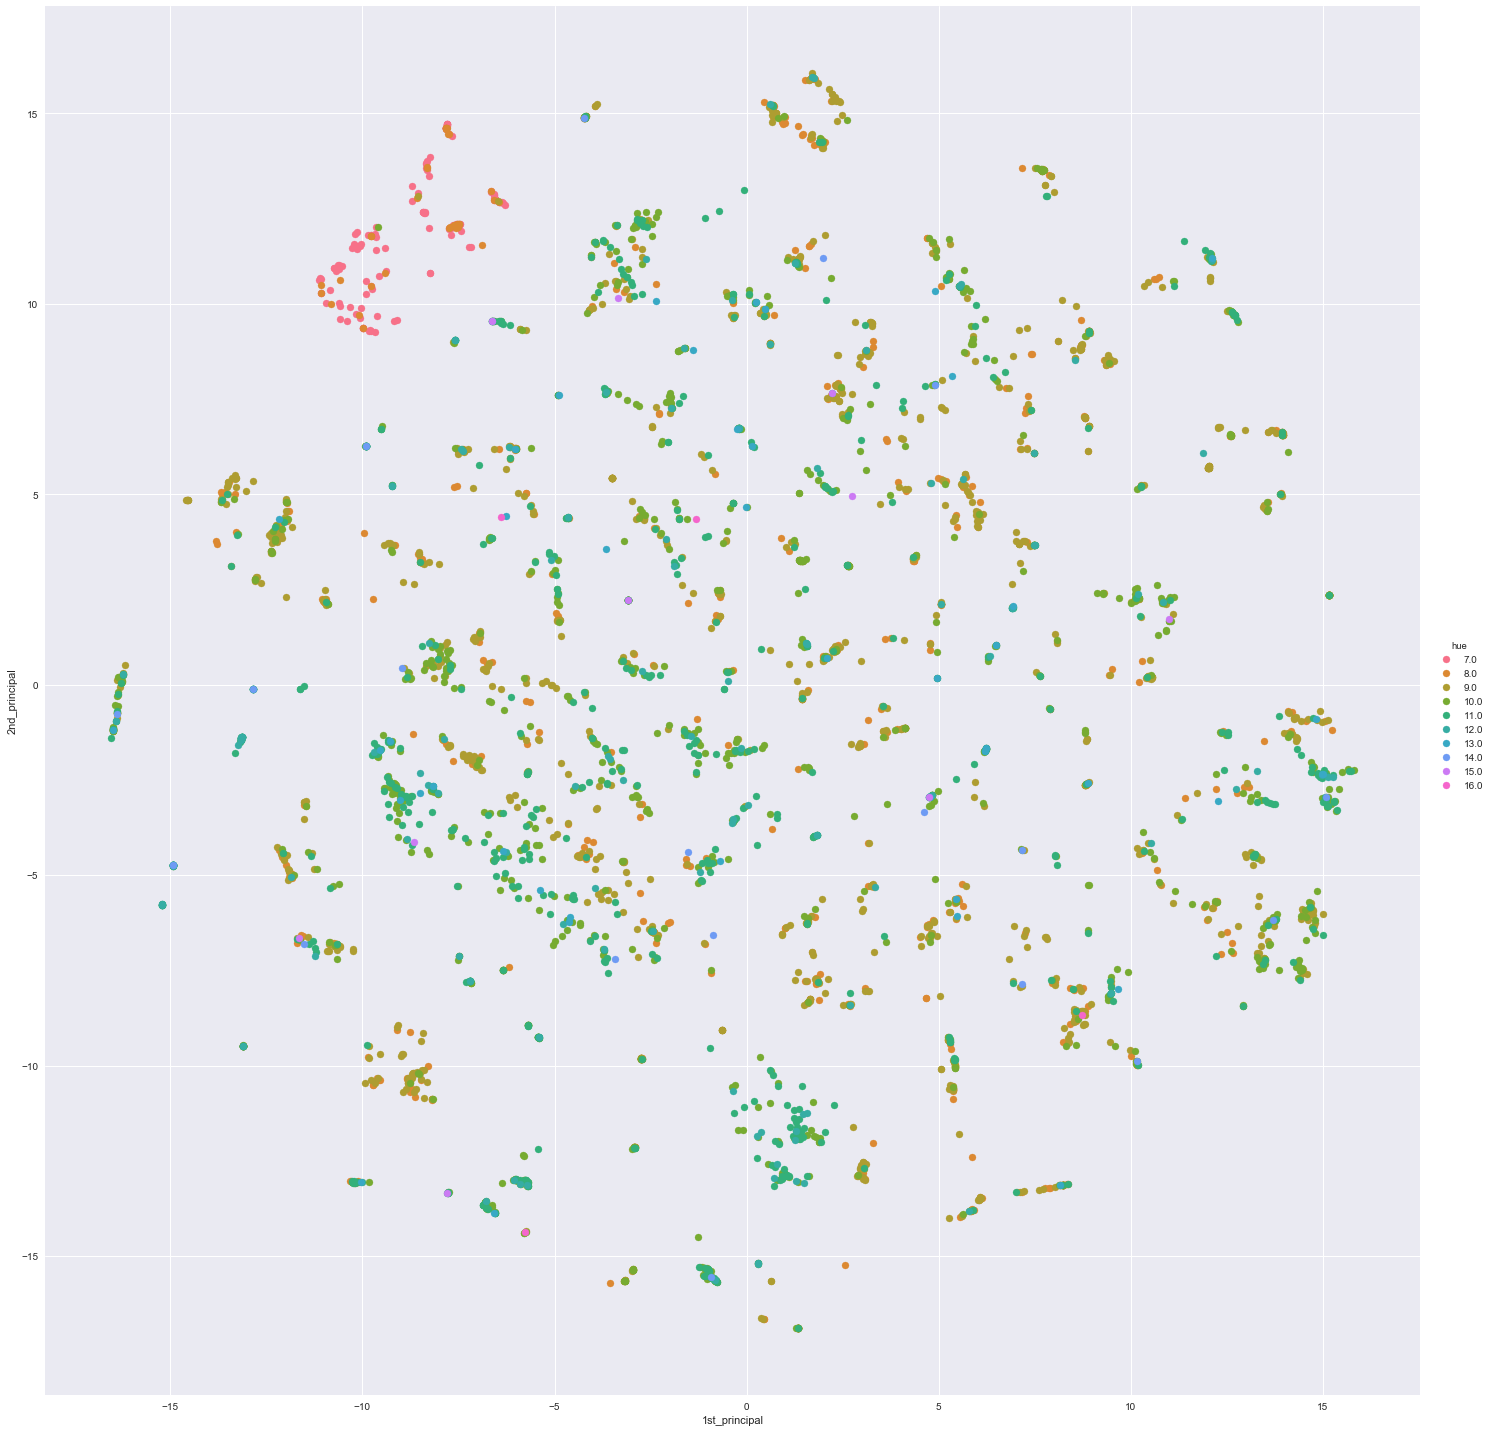

In [56]:
tsne2_data['hue'] = tsne2_data['label']//10

sns.FacetGrid(tsne2_data, hue="hue", size=20).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()
